<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Code-example:-A-MLP-in-Keras" data-toc-modified-id="Code-example:-A-MLP-in-Keras-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Code example: A MLP in Keras</a></span></li><li><span><a href="#Generating-some-training-data" data-toc-modified-id="Generating-some-training-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Generating some training data</a></span></li><li><span><a href="#Building-a-MLP-using-Keras" data-toc-modified-id="Building-a-MLP-using-Keras-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Building a MLP using Keras</a></span></li><li><span><a href="#Training-the-MLP-using-the-training-data" data-toc-modified-id="Training-the-MLP-using-the-training-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Training the MLP using the training data</a></span></li><li><span><a href="#Testing-the-trained-MLP-model" data-toc-modified-id="Testing-the-trained-MLP-model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Testing the trained MLP model</a></span></li></ul></div>

# Code example: A MLP in Keras

In this simple example you will see a first MLP implemented using Keras.

# Generating some training data

The following code will generate a 2D matrix X with a random 2D point (x1,x2) in each row.
The 1D matrix Y contains the desired labels. In Y, the corresponding value for (x1,x2) will be 1 if the point (x1,x2) is within a unit circle with radius 0.5 and 0 else.

X has shape (1000, 2)
Y has shape (1000,)
First 10 rows of X:
 [[-0.00176132  0.89514804]
 [ 0.03715021 -0.04833937]
 [-0.99437344 -0.48209622]
 [-0.38431437  0.14380839]
 [-0.19129126  0.46814831]
 [-0.94755811 -0.90990575]
 [ 0.74477201  0.80427387]
 [-0.61008886  0.5417097 ]
 [-0.13969544  0.89397014]
 [ 0.01284563 -0.89134518]]
First 10 entries of Y:
 [ 0.  1.  0.  1.  0.  0.  0.  0.  0.  0.]


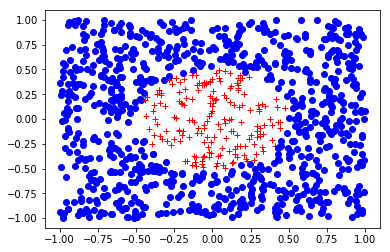

In [3]:
import numpy as np
import matplotlib.pyplot as plt

X = np.random.uniform(low=-1.0, high=+1.0, size=(1000,2))

Y = np.sqrt(X[:,0]**2 + X[:,1]**2) < 0.5
Y = Y.astype(float)

print("X has shape", X.shape)
print("Y has shape", Y.shape)
print("First 10 rows of X:\n", X[0:10])
print("First 10 entries of Y:\n", Y[0:10])

nr_samples = X.shape[0]
for i in range(0,nr_samples):
    if Y[i] == 1:
        plt.plot(X[i,0], X[i,1], 'r+')
    else:
        plt.plot(X[i,0], X[i,1], 'bo')

plt.show()

# Building a MLP using Keras

Here we generate a MLP with 3 neurons in the first hidden layer, 4 neurons in the second hidden layer, and 1 output neuron.

In [4]:
from keras.models import Sequential
from keras import layers
from keras.layers.core import Dense

model = Sequential()
model.add(Dense(3, activation="relu", input_dim=2))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="linear"))

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 16        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


# Training the MLP using the training data

Now we will train the MLP using both the input matrix X and the desired output matrix Y.

In [12]:
model.compile(loss='mean_squared_error', optimizer='sgd')
model.fit(X,Y, epochs=500, verbose=0)

# Testing the trained MLP model

We will now use another 1000 new samples to test the MLP. Each of these 1000 examples is classified to be in class red or class blue.

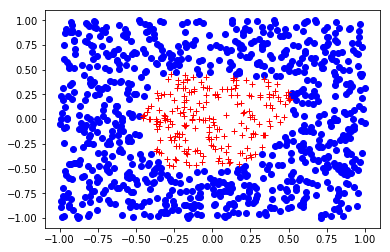

In [49]:
nr_test_samples = 1000

for test_nr in range(0,nr_test_samples):
    x1 = np.random.uniform(low=-1.0, high=+1.0)
    x2 = np.random.uniform(low=-1.0, high=+1.0)   
    vec_x = np.array([[x1, x2]]) 
                           
    output_values = model.predict(vec_x)
    #print(output_values)
    
    if (output_values[0][0] > 0.5):
        plt.plot(x1,x2, 'r+')
    else:
        plt.plot(x1,x2, 'bo')
        
plt.show()    

The results show that the MLP has adapted the weights such that it can roughly classify new points (x1,x2).